<div style="display: flex; align-items: center; justify-content: center; gap: 20px;">
  <!-- Left Column: Image -->
  <div style="flex: 1; text-align: center;">
    <img src="https://i0.wp.com/cdcs.web.ua.pt/wp-content/uploads/2022/05/cropped-cropped-Picture13-1.png?w=968" width="370" height="200" style="display: block; margin: auto;"/>
  </div>

  <!-- Right Column: Text -->
  <div style="flex: 1; text-align: left;">
    <div><strong style="color: #4F5B63; font-size: 1.5em;">Master in Data Science for Social Sciences</strong></div>
    <div><strong style="color: #4F5B63; font-size: 1.2em;">University of Aveiro</strong></div>
    <p style="color: #46627F; font-weight: bold; font-style: italic;">Introduction to Data Science - 2024/2025</p>
    <p style="color: #4F5B63;">João Lourenço Marques</p>
    <p style="color: #4F5B63;">Paulo Batista</p>
  </div>
</div>


<div style="display: flex; justify-content: space-around; align-items: flex-start;">
  <div style="width: 100%; padding: 10px; box-shadow: 0 2px 4px rgba(0,0,0,0.1); margin: 10px;">
    <h2><h1 style="text-align: center; font-size: 4em; color: #46627F; margin-top: 0; margin-bottom: 0; line-height: 1;">Bibliometric Analysis</h1>
<h1 style="text-align: center; color: #B1C0CF; margin-top: 0; margin-bottom: 0; line-height: 1;"> -Scopus Dataset- </h1></h2>
      </div>
</div>

In [2]:
import requests
import pandas as pd
import time
import matplotlib.pyplot as plt


In [ ]:
# Defina a sua chave de API da Elsevier
api_key = "colocar aqui a vossa API key"
query = "data science AND social science"  # Tema dos artigos
url = "https://api.elsevier.com/content/search/scopus"

In [16]:
total_results = data.get("search-results", {}).get("opensearch:totalResults")
print("Total Results:", total_results)

Total Results: 3997447


In [17]:
# Campos a extrair
fields = ",".join([
    "dc:title", "dc:creator", "prism:publicationName", "prism:doi", "affiliation", "citedby-count",
    "pubmed-id", "issn", "isbn", "abstract", "author-keywords", "index-keywords", "publisher",
    "funding-text", "conference-name", "conference-date", "language", "source", "eid"
])

In [23]:
# Inicializar variáveis para paginação e armazenamento de resultados
start = 0
all_articles = []
max_results_per_request = 25  # Limite máximo da API por requisição
request_limit = 500  # Defina um limite de requisições para evitar exceder a cota

# Parâmetros da requisição
params = {
    "query": query,
    "apiKey": api_key,
    "count": 25,  # Número máximo de artigos por requisição
    "start": 0,
    "field": fields  # Especificando os campos
}

# Envio da requisição GET
response = requests.get(url, params=params)
data = response.json()  # Dados em formato JSON

# Verificar e processar os resultados
if response.status_code == 200:
    articles = data.get("search-results", {}).get("entry", [])
    
    # Extrair dados e armazenar em um DataFrame
    articles_data = []
    for article in articles:
        article_info = {
            "Title": article.get("dc:title"),
            "Authors": article.get("dc:creator"),
            "Journal": article.get("prism:publicationName"),
            "DOI": article.get("prism:doi"),
            "Cited by": article.get("citedby-count"),
            "Affiliations": article.get("affiliation"),
            "Abstract": article.get("abstract"),
            "Keywords": article.get("author-keywords"),
            "Index Keywords": article.get("index-keywords"),
            "Publisher": article.get("publisher"),
            "Conference Name": article.get("conference-name"),
            "Conference Date": article.get("conference-date"),
            "Language": article.get("language"),
            "Source": article.get("source"),
            "EID": article.get("eid"),
            "ISSN": article.get("issn"),
            "ISBN": article.get("isbn"),
            "PubMed ID": article.get("pubmed-id"),
            "Funding Text": article.get("funding-text")
        }
        articles_data.append(article_info)
    
    # Criar DataFrame
    df = pd.DataFrame(articles_data)
    display(df)  # Exibe o DataFrame

# Salvar o DataFrame em um arquivo CSV
df.to_csv("scopus_articles.csv", index=False)
print("Dados salvos em 'scopus_articles.csv'")


,Title,Authors,Journal,DOI,Cited by,Affiliations,Abstract,Keywords,Index Keywords,Publisher,Conference Name,Conference Date,Language,Source,EID,ISSN,ISBN,PubMed ID,Funding Text
0,Addressing cybersecurity challenges in robotic...,Tanimu J.A.,Cyber Security and Applications,10.1016/j.csa.2024.100074,0,"[{'@_fa': 'true', 'affiliation-url': 'https://...",None,None,None,None,None,None,None,None,2-s2.0-85206453180,None,None,None,None
1,"The Intersection of Artificial Intelligence, W...",Smerina D.R.,Current Urology Reports,10.1007/s11934-024-01244-2,0,"[{'@_fa': 'true', 'affiliation-url': 'https://...",None,None,None,None,None,None,None,None,2-s2.0-85206029288,None,None,39392527,None
2,Securing industry 4.0: Assessing cybersecurity...,Alqudhaibi A.,Cyber Security and Applications,10.1016/j.csa.2024.100067,0,"[{'@_fa': 'true', 'affiliation-url': 'https://...",None,None,None,None,None,None,None,None,2-s2.0-85200217568,None,None,None,None
3,A survey on scalable consensus algorithms for ...,Jain A.K.,Cyber Security and Applications,10.1016/j.csa.2024.100065,1,"[{'@_fa': 'true', 'affiliation-url': 'https://...",None,None,None,None,None,None,None,None,2-s2.0-85199302315,None,None,None,None
4,Distributed and trustworthy digital twin platf...,Hosseini Bamakan S.M.,Cyber Security and Applications,10.1016/j.csa.2024.100064,0,"[{'@_fa': 'true', 'affiliation-url': 'https://...",None,None,None,None,None,None,None,None,2-s2.0-85198751881,None,None,None,None
5,A novel approach for handling missing data to ...,Tahir M.,Cyber Security and Applications,10.1016/j.csa.2024.100063,0,"[{'@_fa': 'true', 'affiliation-url': 'https://...",None,None,None,None,None,None,None,None,2-s2.0-85198561562,None,None,None,None
6,Exploring the Impact of Communicative Leadersh...,Kumar S.S.,Journal of Ecohumanism,10.62754/joe.v4i1.4086,0,"[{'@_fa': 'true', 'affiliation-url': 'https://...",None,None,None,None,None,None,None,None,2-s2.0-85205285637,None,None,None,None
7,"The Impact of Sustainable Certification on, Ar...",Fadli,Journal of Ecohumanism,10.62754/joe.v4i1.4089,0,"[{'@_fa': 'true', 'affiliation-url': 'https://...",None,None,None,None,None,None,None,None,2-s2.0-85205272235,None,None,None,None
8,Enhancing EEG-based Stress detection: Integrat...,Jagtap S.,Journal of Integrated Science and Technology,10.62110/sciencein.jist.2025.v13.1003,0,"[{'@_fa': 'true', 'affiliation-url': 'https://...",None,None,None,None,None,None,None,None,2-s2.0-85206092538,None,None,None,None
9,Use of Natural Language Processing for the Det...,Shohan M.H.,Journal of Advanced Research in Applied Scienc...,10.37934/araset.51.2.8696,0,"[{'@_fa': 'true', 'affiliation-url': 'https://...",None,None,None,None,None,None,None,None,2-s2.0-85205265354,None,None,None,None


Dados salvos em 'scopus_articles.csv'


___________

In [4]:
df=pd.read_csv('scopus2024.csv')

In [5]:
df.head(2)

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID
0,Muzzall E.; Abraham V.; Nakao R.,"Muzzall, Evan (57215317809); Abraham, Vijoy (5...",57215317809; 57933915400; 56504910800,A perspective on computational research suppor...,2024,Journal of Librarianship and Information Science,56,1,NaN,267,...,NaN,NaN,NaN,English,J. Librariansh. Inf. Sci.,Article,Final,NaN,Scopus,2-s2.0-85140265522
1,Keikhosrokiani P.; Asl M.P.,"Keikhosrokiani, Pantea (54420191700); Asl, Mou...",54420191700; 59046465500,Handbook of research on artificial intelligenc...,2022,Handbook of Research on Artificial Intelligenc...,NaN,NaN,NaN,1,...,978-166846244-7; 1668462427; 978-166846242-3,NaN,NaN,English,Handb. of Res. on Artif. Intell. Appl. in Lit....,Book,Final,NaN,Scopus,2-s2.0-85147938677


In [6]:
df.columns

Index(['Authors', 'Author full names', 'Author(s) ID', 'Title', 'Year',
       'Source title', 'Volume', 'Issue', 'Art. No.', 'Page start', 'Page end',
       'Page count', 'Cited by', 'DOI', 'Link', 'Affiliations',
       'Authors with affiliations', 'Abstract', 'Author Keywords',
       'Index Keywords', 'Molecular Sequence Numbers', 'Chemicals/CAS',
       'Tradenames', 'Manufacturers', 'Funding Details', 'Funding Texts',
       'References', 'Correspondence Address', 'Editors', 'Publisher',
       'Sponsors', 'Conference name', 'Conference date', 'Conference location',
       'Conference code', 'ISSN', 'ISBN', 'CODEN', 'PubMed ID',
       'Language of Original Document', 'Abbreviated Source Title',
       'Document Type', 'Publication Stage', 'Open Access', 'Source', 'EID'],
      dtype='object')

# 2. Analyze Key Bibliometric Indicators

### Summary of the Structure

#### **How Many?**
Explore counts and distributions of articles, authors, and citations to measure research productivity and impact.

- **Total Articles**: Count the number of articles in the dataset.
- **Top Authors by Productivity**: Use `Authors` to identify the most prolific authors.
- **Top Cited Articles**: Sort by `Cited by` to find the articles with the highest impact.
- **Most Frequent Document Types**: Analyze `Document Type` to see the distribution of different publication types (e.g., articles, reviews, conference papers).
- **Open Access vs. Closed Access**: Count and compare documents marked as `Open Access` vs. non-open access.

#### **When?**
Analyze temporal aspects to see trends over time in publication and citations.

- **Publications per Year**: Use `Year` to show trends in publications.
- **Citations per Year**: Sum `Cited by` by year to see citation trends.
- **Trends in Open Access Publications**: Track the increase in `Open Access` publications over time.
- **Publication Stage Trends**: Analyze `Publication Stage` (e.g., "Final" vs. "In Press") by year to understand publishing workflows.

#### **Where?**
Focus on sources, affiliations, and publication venues to understand where research is concentrated.

- **Top Journals by Number of Articles**: Use `Source title` to identify the most frequent publication venues.
- **Top Affiliations**: Analyze `Affiliations` to see which institutions are most active.
- **Geographic Distribution of Research**: If `Conference location` has country or region data, use it to map out geographic concentrations.
- **Frequent Conference Venues**: Use `Conference name` and `Conference location` to identify popular conferences in the field.
- **Top Publishers**: Count occurrences in `Publisher` to identify the main publishers in this area of research.

#### **What?**
Analyze topics, keywords, research focus, and funding patterns.

- **Top Keywords**: Use `Author Keywords` and `Index Keywords` to find common research topics.
- **Frequent Chemicals/CAS Numbers**: If relevant to your field, analyze `Chemicals/CAS` to identify frequently studied chemicals.
- **Common Funding Sources**: Use `Funding Details` or `Funding Texts` to identify major funding bodies or grants.
- **Abstract Word Cloud**: Generate a word cloud from `Abstract` text to visually identify common themes.
- **Research Sponsors**: Analyze `Sponsors` to see which organizations support this research.
- **Research on Molecular Sequences**: Count unique `Molecular Sequence Numbers` if applicable to study trends in sequence-based research.
- **Language of Publication**: Count occurrences in `Language of Original Document` to understand the language distribution in the research field.


## Part 1: How Many?
In this section, we analyze counts, such as the number of articles, citations, authors, and other similar metrics.

In [8]:
# Total number of articles
total_articles = df.shape[0]
print(f"Total number of articles: {total_articles}")

Total number of articles: 414


In [9]:
# Most Frequently Cited Articles
top_cited_articles = df[['Title', 'Cited by']].sort_values(by='Cited by', ascending=False).head(10)
print("Top 10 Most Cited Articles:")
print(top_cited_articles)

Top 10 Most Cited Articles:
                                                 Title  Cited by
268  A review of social science on digital agricult...       710
338  Towards an Ethical Framework for Publishing Tw...       257
388  Where are human subjects in Big Data research?...       252
239  Mapping the Evolution of Social Research and D...       242
223  State-of-the-art on research and applications ...       220
237  The four dimensions of social network analysis...       186
117  Integrating explanation and prediction in comp...       171
374                  Small data in the era of big data       155
402  Quantifying the semantics of search behavior b...       126
313  Quantifying crowd size with mobile phone and T...       110


In [10]:
# Most Productive Authors
author_counts = df['Authors'].str.split(', ').explode().value_counts().head(10)
print("Top 10 Most Productive Authors:")
print(author_counts)

Top 10 Most Productive Authors:
Authors
Williamson B.                                           3
Miller G.J.                                             3
Campagnolo G.M.                                         2
Emmert-Streib F.; Dehmer M.                             2
Simske S.                                               2
Botta F.; Moat H.S.; Preis T.                           2
Hussain A.; Vatrapu R.                                  2
Mukkamala R.R.; Hussain A.; Vatrapu R.                  2
Strukova S.; Ruipérez-Valiente J.A.; Gómez Mármol F.    2
Feng X.; Chen J.; Du J.; Wang W.                        1
Name: count, dtype: int64


In [23]:
# Open Access vs. Closed Access counts
open_access_counts = df['Open Access'].value_counts()
print("Open Access vs. Closed Access:")
print(open_access_counts)

Open Access vs. Closed Access:
Open Access
All Open Access; Gold Open Access                              57
All Open Access; Green Open Access                             35
All Open Access; Hybrid Gold Open Access                       33
All Open Access; Gold Open Access; Green Open Access           28
All Open Access; Bronze Open Access                            24
All Open Access; Green Open Access; Hybrid Gold Open Access     8
All Open Access; Bronze Open Access; Green Open Access          4
Name: count, dtype: int64


<Axes: xlabel='Open Access'>

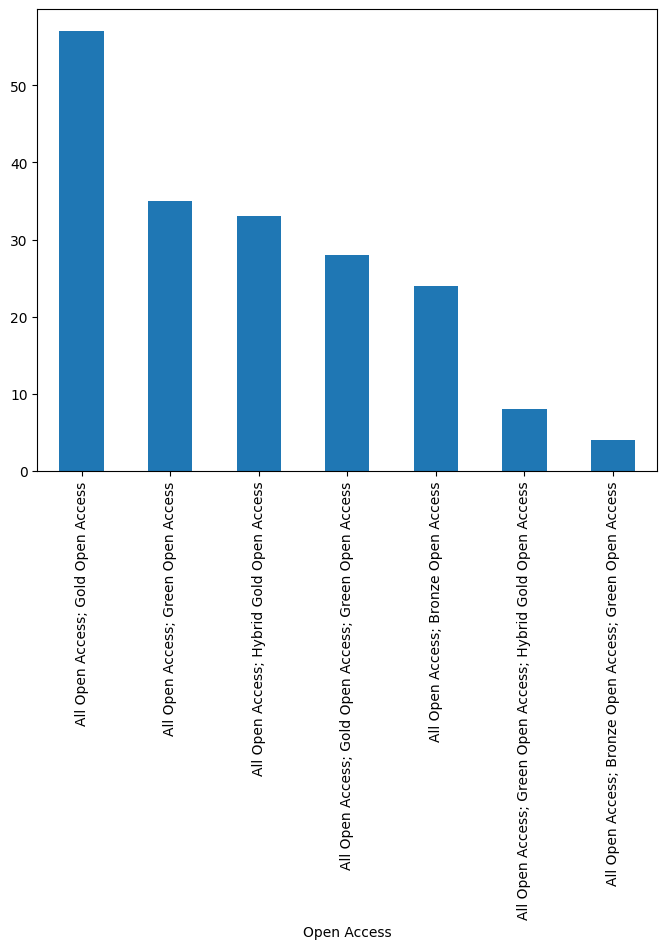

In [26]:
# Plotting the bar chart
plt.figure(figsize=(8, 6))
open_access_counts.plot(kind='bar')

## Part 2: When?
This part will focus on temporal aspects, analyzing trends over time. For instance, it may examine how many articles were published each year.

In [11]:
df['Year']

0      2024
1      2022
2      2023
3      2024
4      2024
       ... 
409    2014
410    2014
411    2015
412    2014
413    2014
Name: Year, Length: 414, dtype: int64

In [12]:
# Yearly publication trends
yearly_publications = df['Year'].value_counts().sort_index()
print("Yearly Publication Trends:")
print(yearly_publications)


Yearly Publication Trends:
Year
2013     1
2014    12
2015    15
2016    18
2017    23
2018    31
2019    45
2020    48
2021    62
2022    63
2023    59
2024    37
Name: count, dtype: int64


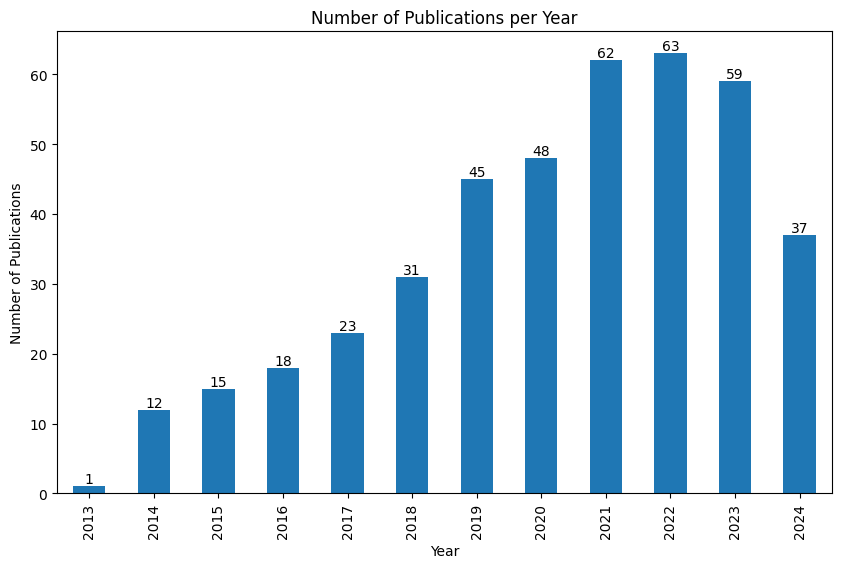

In [13]:
# Plot the number of publications per year
plt.figure(figsize=(10, 6))
ax = yearly_publications.plot(kind='bar', title='Number of Publications per Year')
plt.xlabel("Year")
plt.ylabel("Number of Publications")

# Add labels on top of each bar
ax.bar_label(ax.containers[0])

plt.show()

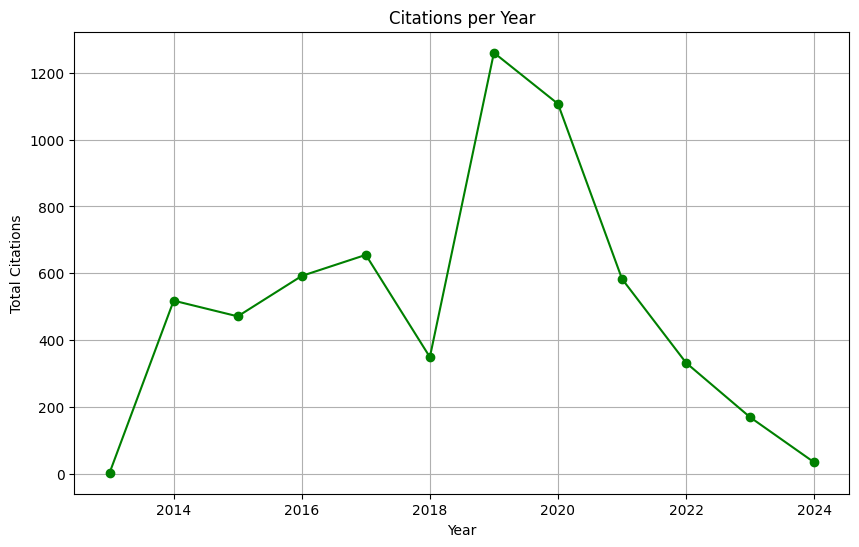

In [57]:
# Sum citations by year
citations_per_year = df.groupby('Year')['Cited by'].sum()

# Plot citations per year
plt.figure(figsize=(10, 6))
citations_per_year.plot(kind='line', marker='o', color='green', title='Citations per Year')
plt.xlabel("Year")
plt.ylabel("Total Citations")
plt.grid(True)
plt.show()

In [56]:
# Display unique values in 'Open Access' column to check for inconsistencies
print(df['Open Access'].unique())

[nan 'all open access; gold open access'
 'all open access; green open access; hybrid gold open access'
 'all open access; hybrid gold open access'
 'all open access; bronze open access'
 'all open access; green open access'
 'all open access; gold open access; green open access'
 'all open access; bronze open access; green open access']


<Figure size 1000x600 with 0 Axes>

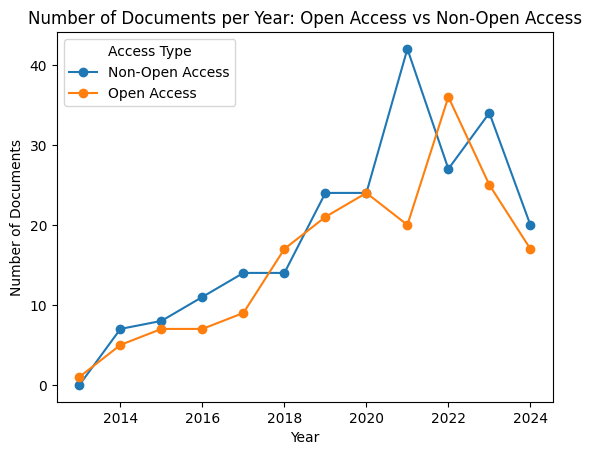

In [54]:
# Create a binary column to indicate open access status
df['Is Open Access'] = df['Open Access'].str.contains("all open access", na=False)

# Group by 'Year' and 'Is Open Access', then count the number of documents
documents_by_access = df.groupby(['Year', 'Is Open Access']).size().unstack(fill_value=0)

# Plot quantity of documents per year for open and non-open access
plt.figure(figsize=(10, 6))
documents_by_access.plot(kind='line', marker='o', title='Number of Documents per Year: Open Access vs Non-Open Access')
plt.xlabel("Year")
plt.ylabel("Number of Documents")
plt.legend(["Non-Open Access", "Open Access"], title="Access Type")
plt.show()


<Figure size 1000x600 with 0 Axes>

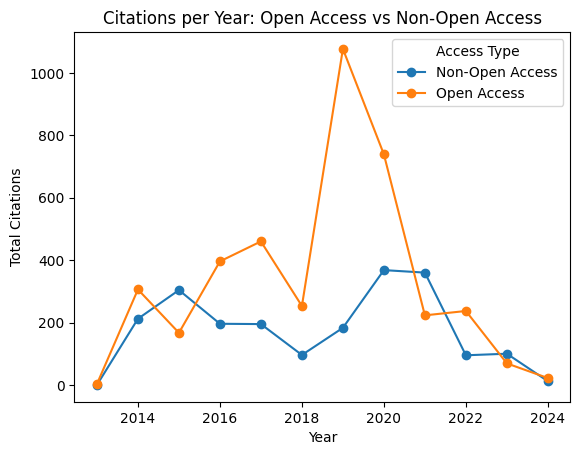

In [51]:
# Create a binary column to indicate open access status
df['Is Open Access'] = df['Open Access'].str.contains("all open access", na=False)

# Group by 'Year' and 'Is Open Access', then sum citations
citations_by_access = df.groupby(['Year', 'Is Open Access'])['Cited by'].sum().unstack(fill_value=0)

# Plot citations per year for open and non-open access
plt.figure(figsize=(10, 6))
citations_by_access.plot(kind='line', marker='o', title='Citations per Year: Open Access vs Non-Open Access')
plt.xlabel("Year")
plt.ylabel("Total Citations")
plt.legend(["Non-Open Access", "Open Access"], title="Access Type")
plt.show()


## Part 3: Where?
This section will examine where the research has been published, looking into journals, conferences, and affiliations.

In [14]:
# Most Cited Journals
journal_citations = df.groupby('Source title')['Cited by'].sum().sort_values(ascending=False).head(10)
print("Top 10 Most Cited Journals:")
print(journal_citations)

Top 10 Most Cited Journals:
Source title
NJAS - Wageningen Journal of Life Sciences                                         710
Big Data and Society                                                               361
Sociology                                                                          257
Social Indicators Research                                                         242
Royal Society Open Science                                                         227
Energy and Buildings                                                               220
Nature                                                                             200
Information Fusion                                                                 186
GeoJournal                                                                         155
Proceedings of the National Academy of Sciences of the United States of America    126
Name: Cited by, dtype: int64


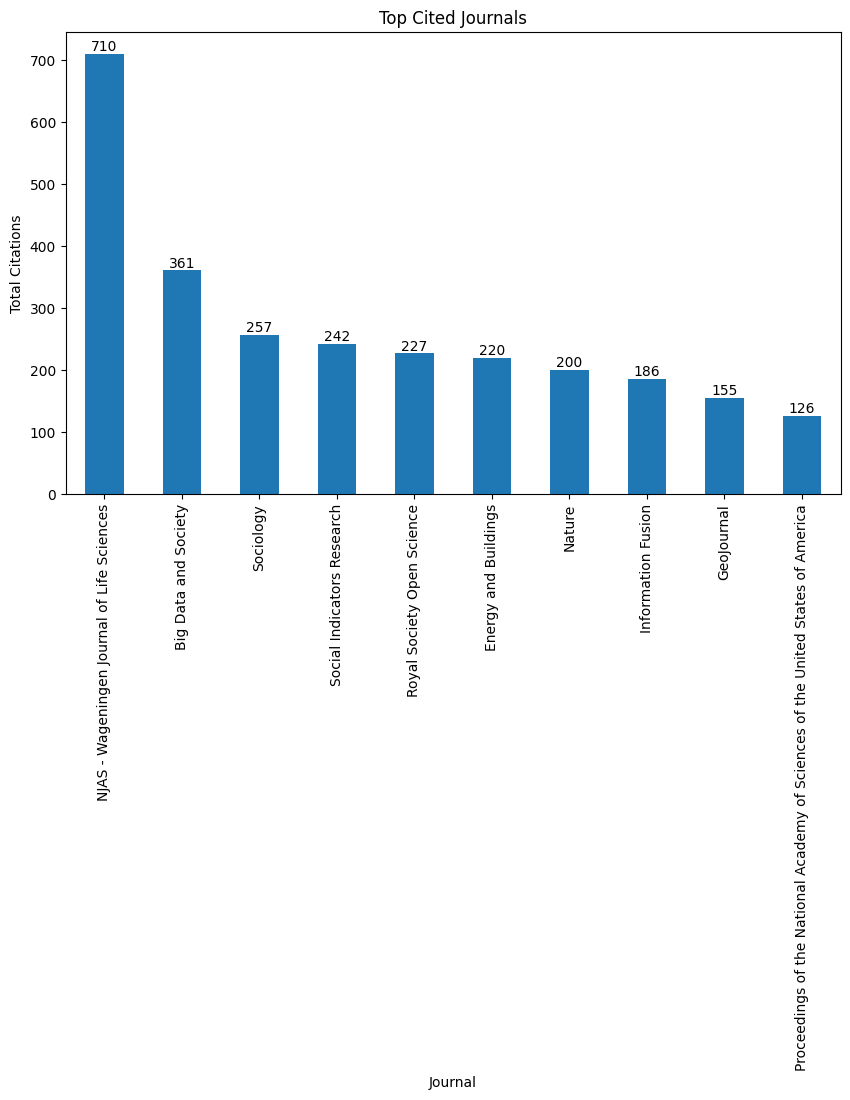

In [75]:
# Plot of Most Cited Journals
plt.figure(figsize=(10, 6))
ax = journal_citations.plot(kind='bar', title='Top Cited Journals')
plt.xlabel("Journal")
plt.ylabel("Total Citations")

# Add labels directly on top of the bars
ax.bar_label(ax.containers[0])

plt.show()


## Part 4: What?
In this final section, you will analyze the topics and themes within the research, such as keywords, abstract content, and funding sources.

Type of Documents:
Document Type
Article              176
Conference paper     134
Book                  35
Review                30
Book chapter          18
Editorial             11
Conference review      4
Data paper             3
Note                   2
Erratum                1
Name: count, dtype: int64


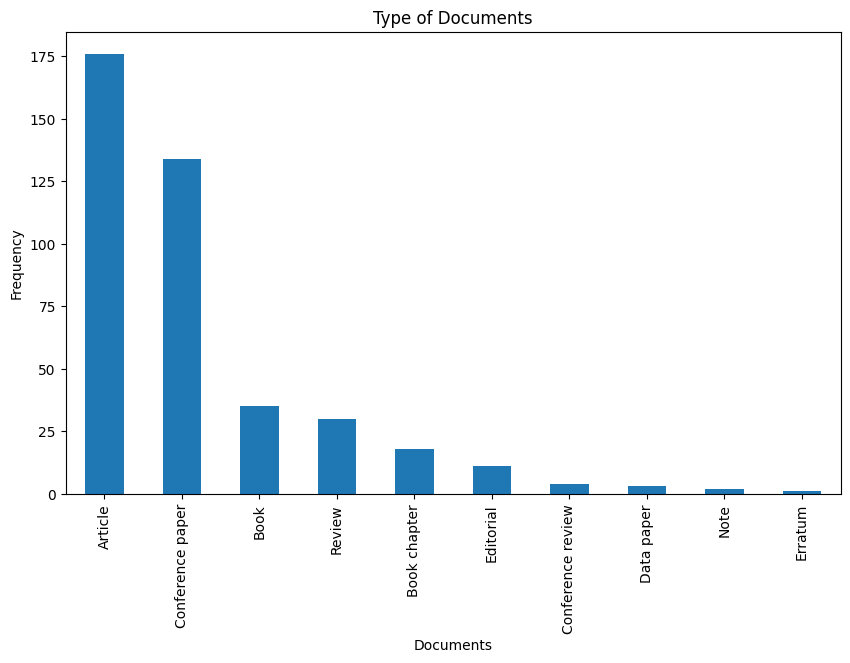

In [21]:
# Most Frequent Keywords
df['Document Type'] = df['Document Type'].fillna('')
all_keywords = df['Document Type'].str.split('; ').explode().value_counts().head(10)
print("Type of Documents:")
print(all_keywords)

# Plot top keywords
plt.figure(figsize=(10, 6))
all_keywords.plot(kind='bar', title='Type of Documents')
plt.xlabel("Documents")
plt.ylabel("Frequency")
plt.show()

Top 10 Author Keywords:
Author Keywords
                                73
Data science                    73
data science                    60
Big data                        37
computational social science    32
Computational social science    20
Data Science                    17
Machine learning                16
big data                        16
machine learning                15
Name: count, dtype: int64


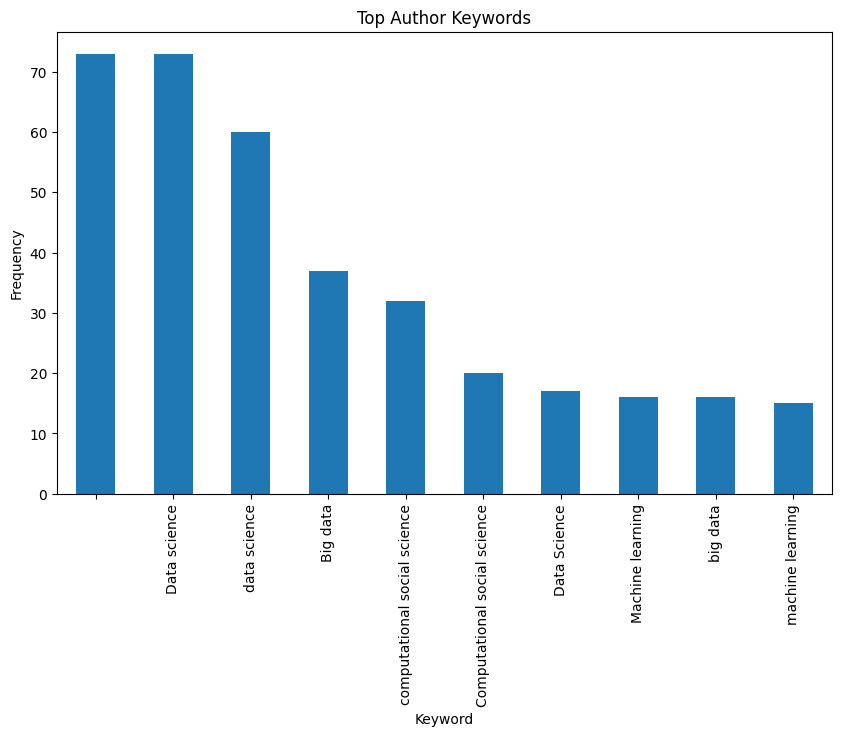

In [18]:
# Most Frequent Keywords
df['Author Keywords'] = df['Author Keywords'].fillna('')
all_keywords = df['Author Keywords'].str.split('; ').explode().value_counts().head(10)
print("Top 10 Author Keywords:")
print(all_keywords)

# Plot top keywords
plt.figure(figsize=(10, 6))
all_keywords.plot(kind='bar', title='Top Author Keywords')
plt.xlabel("Keyword")
plt.ylabel("Frequency")
plt.show()
